# Import Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load Dataset

In [2]:
data = pd.read_csv("coin_Bitcoin.csv")

In [3]:
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [5]:
data.isna().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [6]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
# Set 'Date' column as the index
data.set_index('Date', inplace=True)

In [8]:
data.head()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2013-04-29 23:59:59,1,Bitcoin,BTC,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
2013-04-30 23:59:59,2,Bitcoin,BTC,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2013-05-01 23:59:59,3,Bitcoin,BTC,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
2013-05-02 23:59:59,4,Bitcoin,BTC,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
2013-05-03 23:59:59,5,Bitcoin,BTC,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [9]:
data.shape

(2991, 9)

## Time Series Visualization

- Plot the time series of Bitcoin prices
- Plot the distribution of Bitcoin prices


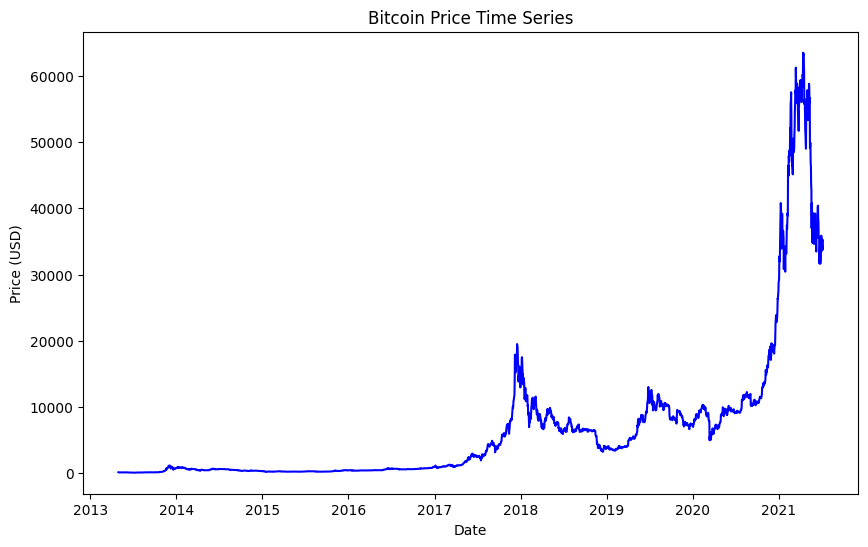

In [10]:
# Plot the time series of Bitcoin prices
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], color='blue')
plt.title('Bitcoin Price Time Series')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

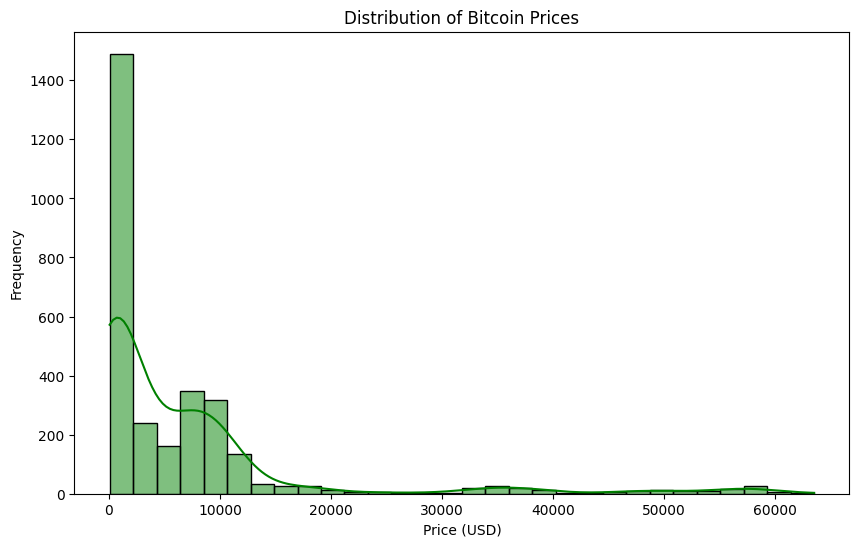

In [11]:
# Plot the distribution of Bitcoin prices
plt.figure(figsize=(10, 6))
sns.histplot(data['Close'], bins=30, kde=True, color='green')
plt.title('Distribution of Bitcoin Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

## Feature Analysis

- Explore the relationships between features and close price

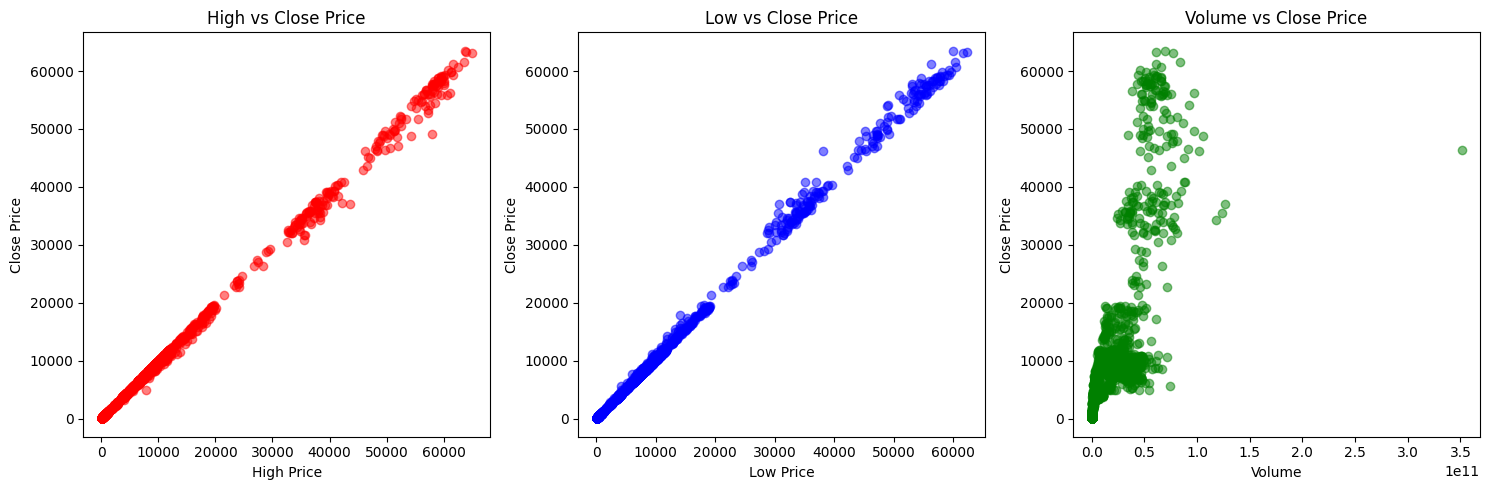

In [12]:
# Scatter plots of features vs. close price
plt.figure(figsize=(15, 5))

# High vs. Close
plt.subplot(1, 3, 1)
plt.scatter(data['High'], data['Close'], alpha=0.5, color='red')
plt.title('High vs Close Price')
plt.xlabel('High Price')
plt.ylabel('Close Price')

# Low vs. Close
plt.subplot(1, 3, 2)
plt.scatter(data['Low'], data['Close'], alpha=0.5, color='blue')
plt.title('Low vs Close Price')
plt.xlabel('Low Price')
plt.ylabel('Close Price')

# Volume vs. Close
plt.subplot(1, 3, 3)
plt.scatter(data['Volume'], data['Close'], alpha=0.5, color='green')
plt.title('Volume vs Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')

plt.tight_layout()
plt.show()

# Algorithms

In [13]:
# Define features (X) and target variable (y)
X = data[['Open', 'Close', 'High', 'Low', 'Volume', 'Marketcap']].values  # Using multiple features
y = ((data['Close'].shift(-1) > data['Close']).astype(int)).values  # Binary target variable: 1 if price increases, 0 otherwise

In [14]:
# Drop the last row as there's no label for it (since we're using shifted data for y)
X = X[:-1]
y = y[:-1]

In [15]:
y

array([0, 0, 0, ..., 1, 0, 1])

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train

array([[6.36030029e+02, 6.36786011e+02, 6.38833008e+02, 6.35028992e+02,
        6.16207000e+07, 1.01380789e+10],
       [3.82114014e+02, 3.79653992e+02, 3.83130005e+02, 3.76398987e+02,
        7.43756000e+07, 5.77055097e+09],
       [5.85952026e+02, 5.84653015e+02, 5.87486023e+02, 5.83098022e+02,
        1.44979000e+07, 7.66338305e+09],
       ...,
       [5.36515015e+02, 5.37971985e+02, 5.40351990e+02, 5.33078003e+02,
        6.03782000e+07, 8.39959892e+09],
       [7.05195984e+02, 7.02031006e+02, 7.05257019e+02, 6.87315002e+02,
        8.03180960e+07, 1.12151811e+10],
       [2.34869995e+02, 2.39839996e+02, 2.42912003e+02, 2.34681000e+02,
        2.54737000e+07, 3.49774861e+09]])

In [18]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
X_train_scaled

array([[-0.53835351, -0.53892316, -0.53831886, -0.5397024 , -0.57015689,
        -0.52649293],
       [-0.56025199, -0.56110123, -0.55969969, -0.56290466, -0.56950265,
        -0.54666155],
       [-0.54267239, -0.54341972, -0.54261229, -0.54436124, -0.57257397,
        -0.53792072],
       ...,
       [-0.54693598, -0.54744604, -0.54655344, -0.54884865, -0.57022062,
        -0.53452098],
       [-0.53238843, -0.53329567, -0.53276476, -0.53501171, -0.56919785,
        -0.52151903],
       [-0.57295076, -0.57316042, -0.57142414, -0.57561849, -0.57201098,
        -0.55715703]])

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu',),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='softmax')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, validation_split=0.2)


Epoch 1/20
30/30 [==============================] - 1s 10ms/step - loss: 0.7005 - accuracy: 0.5416 - val_loss: 0.6945 - val_accuracy: 0.5282
Epoch 2/20
30/30 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.5416 - val_loss: 0.6972 - val_accuracy: 0.5282
Epoch 3/20
30/30 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5416 - val_loss: 0.6954 - val_accuracy: 0.5282
Epoch 4/20
30/30 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5416 - val_loss: 0.7016 - val_accuracy: 0.5282
Epoch 5/20
30/30 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5416 - val_loss: 0.6955 - val_accuracy: 0.5282
Epoch 6/20
30/30 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.5416 - val_loss: 0.6932 - val_accuracy: 0.5282
Epoch 7/20
30/30 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5416 - val_loss: 0.6934 - val_accuracy: 0.5282
Epoch 8/20
30/30 [=

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
predictions = rf_model.predict(X_test_scaled)

# Evaluate model performance
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.26854063545150497


In [23]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get best parameters
best_params = grid_search.best_params_

# Train model with best parameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train_scaled, y_train)


RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=300,
                      random_state=42)

In [24]:
preds = best_rf_model.predict(X_test_scaled)

In [25]:
mse = mean_squared_error(y_test, preds)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.2474601154804965
